# Neural Network with Tensorflow + Keras

In this session we will create a neural network with Keras and Tensorflow to classify Dogs and Cats

We will first add the appropriate libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

If the package cv2 doesn't exist, type:

pip install opencv-python

Now we wil load the images from the directory

In [2]:
# You must add an r to the start of the string or else an error will occur
DATADIR = r"C:\Users\Dor Nisim\Desktop\Teaching\tirgul2\kagglecatsanddogs_3367a\PetImages"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)  # path to cats or dogs dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        break
    break

The image is now in grayscale

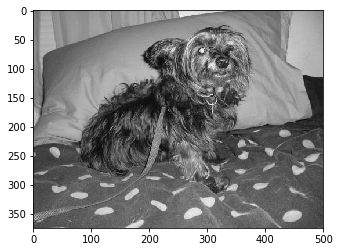

In [3]:
plt.imshow(img_array, cmap="gray")
plt.show()

Add we have the data of the image

In [4]:
print("The shape of the image is ", img_array.shape)
print(img_array)

The shape of the image is  (375, 500)
[[117 117 119 ... 133 132 132]
 [118 117 119 ... 135 134 134]
 [119 118 120 ... 137 136 136]
 ...
 [ 79  74  73 ...  80  76  73]
 [ 78  72  69 ...  72  73  74]
 [ 74  71  70 ...  75  73  71]]


We would like to make all the images in same shape (i.e. all the images will have the same dimensions)

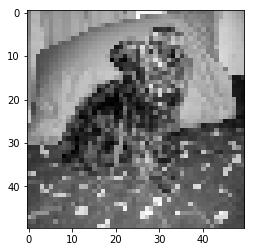

In [5]:
IMG_SIZE = 50  #Setting the constant size of each image
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

plt.imshow(new_array, cmap = 'gray')
plt.show()

We can see that the image is still recognizable

However if we set the image size to 10, we will receive a blurr image

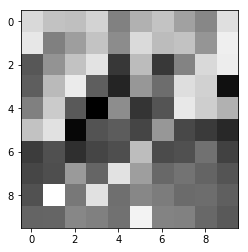

In [6]:
IMG_SIZE = 10  #Setting the constant size of each image
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

plt.imshow(new_array, cmap = 'gray')
plt.show()

Now, let's create the train and test set

In [3]:
IMG_SIZE = 50  #Setting the constant size of each image
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)  # path to cats or dogs dir
        class_num = CATEGORIES.index(category)  #setting that 0 is a dog and 1 is a cat
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass   # do nothing
            
create_training_data()    # Create the training data

The amount of data in the training is:

In [8]:
print(len(training_data))

24946


Now we would like to shuffle the data

In [9]:
import random

random.shuffle(training_data)

Let's display the first 10 labels of the data

In [10]:
for sample in training_data[:10]:
    print(sample[1])

0
1
0
0
1
0
0
0
0
1


We now want to separate the image and the label

In [4]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

# We need to convert the List of images to a numpy array for Tensorflow
# We create a numpy array where the image is in the shape of (50,50,1). 1 since this is a grey scale
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print(X[0].shape)

(50, 50, 1)


In order for us to save the data for future uses, we will use pickle

In [12]:
import pickle 

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [13]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [14]:
X[1]

array([[[176],
        [187],
        [178],
        ...,
        [148],
        [111],
        [131]],

       [[159],
        [182],
        [193],
        ...,
        [134],
        [124],
        [100]],

       [[185],
        [179],
        [189],
        ...,
        [139],
        [139],
        [100]],

       ...,

       [[156],
        [ 76],
        [ 92],
        ...,
        [ 70],
        [175],
        [144]],

       [[ 98],
        [182],
        [168],
        ...,
        [142],
        [157],
        [137]],

       [[115],
        [164],
        [123],
        ...,
        [ 75],
        [159],
        [ 60]]], dtype=uint8)

# Training a conv network with the data

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
import pickle

In [4]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)


We would like to normalize the data before training the model

In [5]:
X = X/255.0

In [6]:
print(X[0])

[[[0.35686275]
  [0.36470588]
  [0.42745098]
  ...
  [0.21568627]
  [0.36078431]
  [0.36862745]]

 [[0.36470588]
  [0.36470588]
  [0.40392157]
  ...
  [0.28235294]
  [0.15294118]
  [0.38431373]]

 [[0.36470588]
  [0.36470588]
  [0.37647059]
  ...
  [0.25882353]
  [0.06666667]
  [0.39607843]]

 ...

 [[0.7372549 ]
  [0.78431373]
  [0.76862745]
  ...
  [0.59215686]
  [0.83137255]
  [0.6627451 ]]

 [[0.66666667]
  [0.74509804]
  [0.77647059]
  ...
  [0.48627451]
  [0.81960784]
  [0.84313725]]

 [[0.76470588]
  [0.81568627]
  [0.77254902]
  ...
  [0.6       ]
  [0.63529412]
  [0.56078431]]]


We created a Conv layer with 64 convolution filters and 3x3 window size, that recieve the image dimensions

In [7]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [8]:
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatening the data
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

#output layer
model.add(Dense(2))
model.add(Activation('softmax'))

To visualize the model, we will write the following command:

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0         
__________

In [10]:
adamOptimizer = tf.keras.optimizers.Adam(lr=0.001)

model.compile(loss = 'sparse_categorical_crossentropy', 
             optimizer='adam',
             metrics=['accuracy'])


After creating and training the model, we would like to store it in a file for later use. Hence we will use TensorBoard

In [11]:
import time

class TrainValTensorBoard(TensorBoard):
    def __init__(self, log_dir='./logs', **kwargs):
        NAME = "Cats-vs-dogss-ccn-64x2-{}".format(int(time.time()))
        # Make the original `TensorBoard` log to a subdirectory 'training'
        training_log_dir = os.path.join(log_dir, "%s_%s" % (NAME,"Training"))
        super(TrainValTensorBoard, self).__init__(training_log_dir, **kwargs)

        # Log the validation metrics to a separate subdirectory
        self.val_log_dir = os.path.join(log_dir, "%s_%s" % (NAME,'validation'))

    def set_model(self, model):
        # Setup writer for validation metrics
        self.val_writer = tf.summary.FileWriter(self.val_log_dir)
        super(TrainValTensorBoard, self).set_model(model)

    def on_epoch_end(self, epoch, logs=None):
        # Pop the validation logs and handle them separately with
        # `self.val_writer`. Also rename the keys so that they can
        # be plotted on the same figure with the training metrics
        logs = logs or {}
        val_logs = {k.replace('val_', 'epoch_'): v for k, v in logs.items() if k.startswith('val_')}
        for name, value in val_logs.items():
            summary = tf.Summary()
            summary_value = summary.value.add()
            summary_value.simple_value = value.item()
            summary_value.tag = name
            self.val_writer.add_summary(summary, epoch)
        self.val_writer.flush()

        # Pass the remaining logs to `TensorBoard.on_epoch_end`
        logs = {k: v for k, v in logs.items() if not k.startswith('val_')}
        super(TrainValTensorBoard, self).on_epoch_end(epoch, logs)

    def on_train_end(self, logs=None):
        super(TrainValTensorBoard, self).on_train_end(logs)
        self.val_writer.close()

In [12]:
model.fit(X, y, batch_size=32, epochs = 3, validation_split=0.1, callbacks=[TrainValTensorBoard(write_graph=False)])

Train on 22451 samples, validate on 2495 samples
Epoch 1/3
22451/22451 [==============================] - 25s 1ms/step - loss: 0.6094 - acc: 0.6566 - val_loss: 0.5409 - val_acc: 0.7315
Epoch 2/3
22451/22451 [==============================] - 19s 851us/step - loss: 0.4970 - acc: 0.7580 - val_loss: 0.4735 - val_acc: 0.7784
Epoch 3/3
22451/22451 [==============================] - 20s 886us/step - loss: 0.4468 - acc: 0.7876 - val_loss: 0.4805 - val_acc: 0.7792


In [ ]:
train_loss, train_acc = model.evaluate(X,y)

20608/24946 [=======================>......] - ETA: 7s

# Using TensorBoard

After completing the traning of the model, we can view measures in TensorBoard:

Redirect to the logs folder that you created and type the following command in cmd:

In [ ]:
tensorboard --logdir="logs"

Open a browser and redirct to the following URL:

In [ ]:
http://localhost:6006

In [48]:
import random

IMG_SIZE = 50  #Setting the constant size of each image
training_data = []
for category in CATEGORIES:
    count = 0;                
    path = os.path.join(DATADIR, category)  # path to cats or dogs dir
    class_num = CATEGORIES.index(category)  #setting that 0 is a dog and 1 is a cat
    for img in os.listdir(path):
        count = count + 1;               # increase the image count
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            training_data.append([img_array, class_num])
        except Exception as e:
            pass   # do nothing
        if count == 5:
            break;
        
random.shuffle(training_data)
testPairs = training_data;     # Getting a sample of 10 images

process_test =[cv2.resize(pair[0], (IMG_SIZE, IMG_SIZE))/255.0 for pair in testPairs] # resizing the images
test_labels = [pair[1] for pair in testPairs]
process_test= np.array(process_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)   # resize the array for the model
predictions = model.predict(process_test)

In [49]:
print(testPairs)

[[array([[117, 117, 119, ..., 133, 132, 132],
       [118, 117, 119, ..., 135, 134, 134],
       [119, 118, 120, ..., 137, 136, 136],
       ...,
       [ 79,  74,  73, ...,  80,  76,  73],
       [ 78,  72,  69, ...,  72,  73,  74],
       [ 74,  71,  70, ...,  75,  73,  71]], dtype=uint8), 0], [array([[ 29,  27,  23, ..., 149, 148, 147],
       [ 33,  32,  29, ..., 149, 148, 147],
       [ 35,  38,  39, ..., 149, 149, 146],
       ...,
       [143, 142, 136, ..., 152, 149, 144],
       [141, 141, 138, ..., 153, 150, 143],
       [144, 143, 142, ..., 153, 151, 144]], dtype=uint8), 1], [array([[255, 211, 199, ..., 201, 208, 210],
       [222, 157, 125, ..., 107, 106, 104],
       [237, 157, 110, ...,  93,  88,  86],
       ...,
       [254, 251, 248, ..., 238, 238, 240],
       [254, 253, 251, ..., 244, 244, 245],
       [253, 253, 253, ..., 249, 248, 249]], dtype=uint8), 0], [array([[122, 111, 105, ..., 121, 123, 123],
       [126, 117, 115, ..., 120, 122, 122],
       [122, 114, 114,

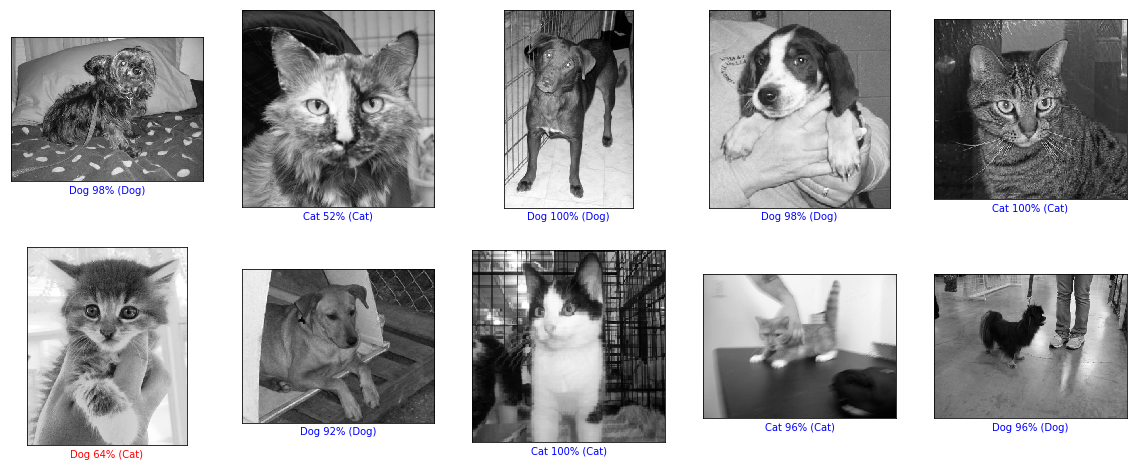

In [55]:
import matplotlib.pyplot as plt

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap='gray')

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(CATEGORIES[predicted_label],
                                100*np.max(predictions_array),
                                CATEGORIES[true_label]),
                                color=color)

num_rows = 2
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, num_cols, i+1)
  plot_image(i, predictions, test_labels, [pair[0] for pair in testPairs])

## Saving the model

Once we created a model, we would like to store it to future use
<br>
<br>
Install the following package:

In [ ]:
pip install h5py

Now we can store our model by simply typing:

In [13]:
from tensorflow.keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')

In [14]:
train_loss, train_acc = model.evaluate(X,y)

24946/24946 [==============================] - 8s 331us/step


In [15]:
print("loss: ",train_loss, "acc: ",  train_acc)

loss:  0.4281420779239679 acc:  0.8034153772243413
